In [89]:
import pandas as pd 

In [90]:
df=pd.read_csv('data/gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [91]:
sample_df = df.sample(n=50000)
sample_df.shape

(50000, 11)

In [92]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [93]:
# No missing value present in the data

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [96]:
sample_df.reset_index(inplace=True)

In [98]:
# dropping index and id column 
sample_df = sample_df.drop(labels=["index","id"],axis=1)

In [101]:
sample_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.38,Good,I,VVS1,63.4,55.0,4.60,4.63,2.93,744
1,2.04,Very Good,J,VS2,60.2,60.0,8.16,8.21,4.95,14801
2,1.31,Ideal,G,VS2,62.3,56.0,6.97,7.00,4.35,9103
3,0.90,Premium,E,SI1,63.0,57.0,6.12,6.06,3.84,4692
4,1.50,Very Good,H,VS1,63.2,59.0,7.28,7.23,4.57,11883


In [103]:
#checking for the duplicates records
sample_df.duplicated().sum()

0

In [105]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   x        50000 non-null  float64
 7   y        50000 non-null  float64
 8   z        50000 non-null  float64
 9   price    50000 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [106]:
#segrating numerical and catogarical object
numericals_columns = sample_df.columns[sample_df.dtypes!='object']
catogarical_columns = sample_df.columns[sample_df.dtypes == 'object']

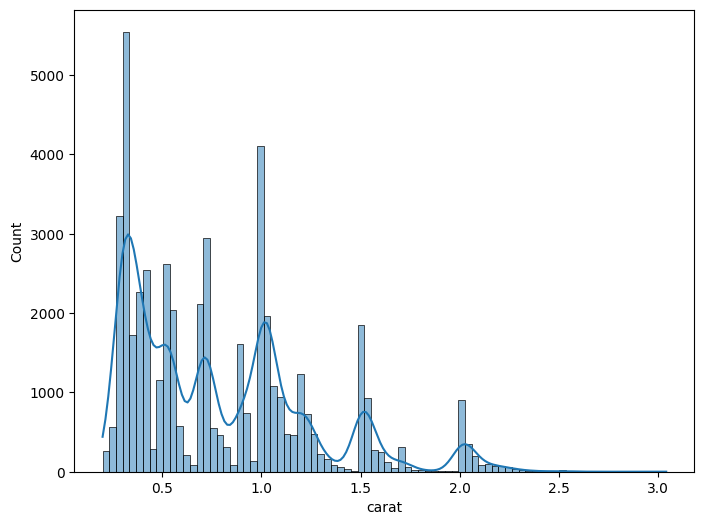

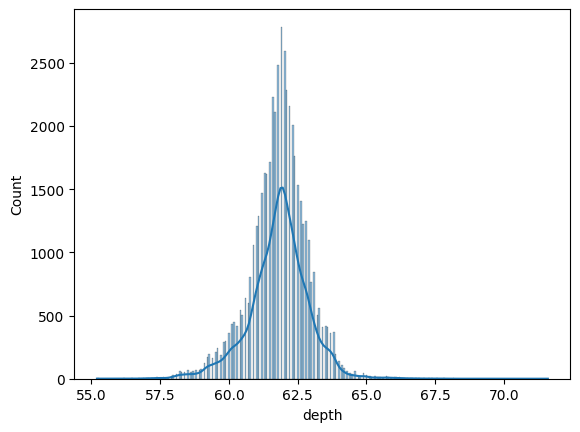

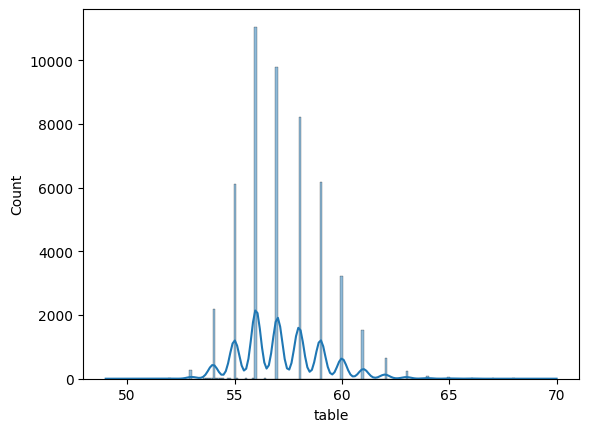

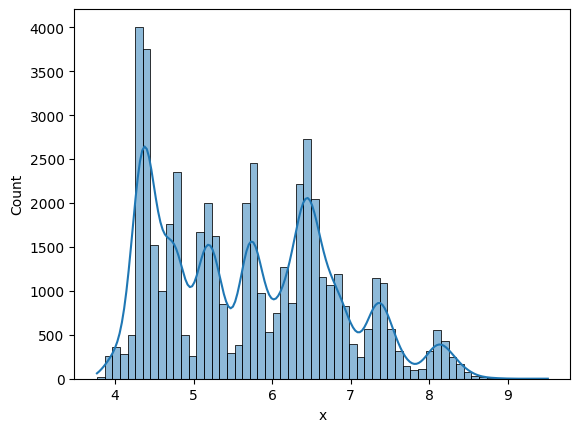

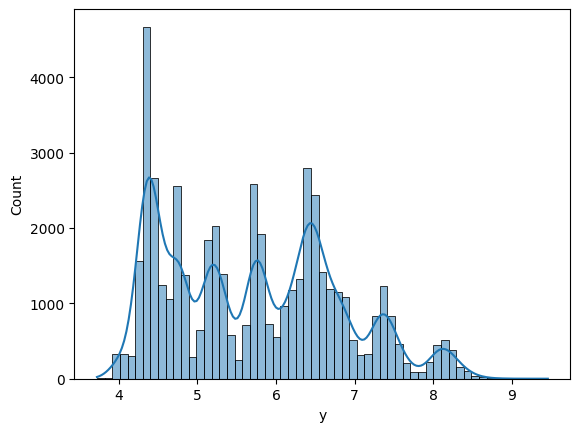

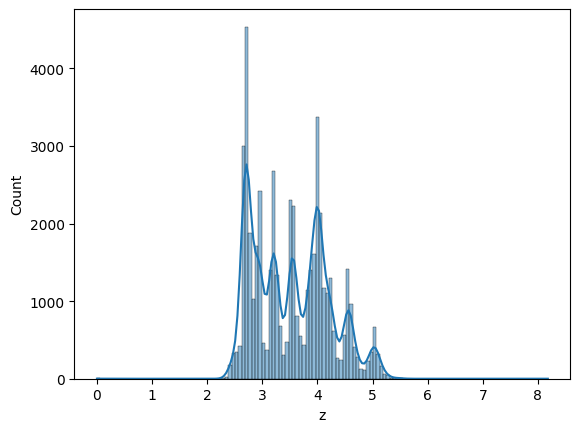

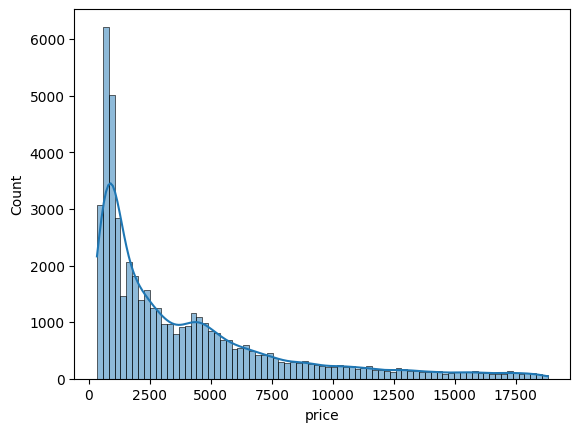

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,6))
x=0
for i in numericals_columns:
    sns.histplot(data=sample_df,x=i,kde=True)
    print('\n')
    plt.show()

<Axes: >

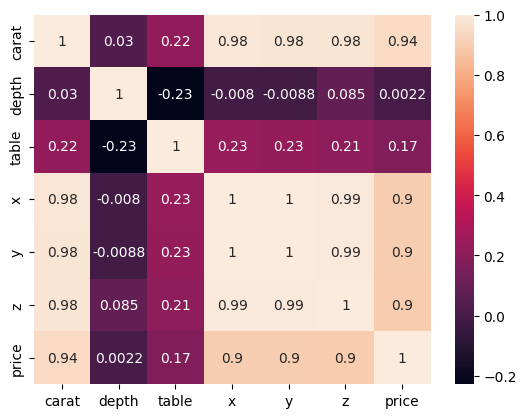

In [126]:
# observing the correleation 
sns.heatmap(sample_df.corr(numeric_only=[catogarical_columns]),annot=True)

In [127]:
##Currently we will not execute this
## df.drop(labels=['x','y','z'],axis=1)

In [128]:
sample_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.38,Good,I,VVS1,63.4,55.0,4.60,4.63,2.93,744
1,2.04,Very Good,J,VS2,60.2,60.0,8.16,8.21,4.95,14801
2,1.31,Ideal,G,VS2,62.3,56.0,6.97,7.00,4.35,9103
3,0.90,Premium,E,SI1,63.0,57.0,6.12,6.06,3.84,4692
4,1.50,Very Good,H,VS1,63.2,59.0,7.28,7.23,4.57,11883


In [129]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [133]:
cut_map = {"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5} 
# ideal is the best quality

In [138]:
sample_df['clarity'].unique()

array(['VVS1', 'VS2', 'SI1', 'VS1', 'SI2', 'VVS2', 'I1', 'IF'],
      dtype=object)

In [136]:
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [139]:
sample_df['color'].unique()

array(['I', 'J', 'G', 'E', 'H', 'F', 'D'], dtype=object)

In [137]:
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [140]:
sample_df['cut']=sample_df['cut'].map(cut_map)
sample_df['clarity'] = sample_df['clarity'].map(clarity_map)
sample_df['color'] = sample_df['color'].map(color_map)